In [2]:
from google.colab import files
uploaded = files.upload()   # upload sales.csv file


Saving sales.csv to sales.csv


In [3]:
import pandas as pd

df = pd.read_csv("sales.csv")
df.head()


,OrderID,Date,Product,Quantity,Price,Customer,City
0,1,2024-01-05,Laptop,2,55000.0,John,Mumbai
1,2,2024-01-06,Mouse,5,NaN,Meera,Delhi
2,3,2024-01-07,Laptop,-1,56000.0,Amit,NaN
3,4,2024-01-08,Keyboard,3,1500.0,Neha,Pune
4,5,2024-01-09,Monitor,4,20000.0,Ravi,Chennai


In [4]:
# Handle missing values
df['Price'].fillna(df['Price'].mean(), inplace=True)
df['City'].fillna("Unknown", inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Fix negative quantities
df['Quantity'] = df['Quantity'].apply(lambda x: abs(x))

# Convert date column
df['Date'] = pd.to_datetime(df['Date'])

# Create a total sales column
df['Total'] = df['Quantity'] * df['Price']


/tmp/ipython-input-801217758.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].mean(), inplace=True)
/tmp/ipython-input-801217758.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

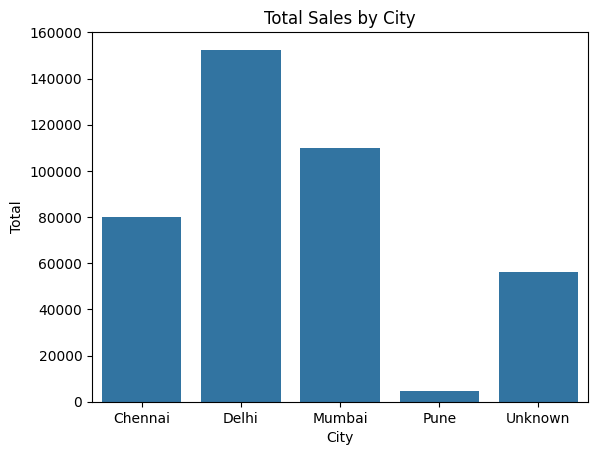

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sales_by_city = df.groupby('City')['Total'].sum().reset_index()
sns.barplot(data=sales_by_city, x='City', y='Total')
plt.title("Total Sales by City")
plt.show()


In [6]:
df.to_csv("clean_sales.csv", index=False)
files.download("clean_sales.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
df.describe()


,OrderID,Date,Quantity,Price,Total
count,5.000000,5,5.000000,5.000000,5.000000
mean,3.000000,2024-01-07 00:00:00,3.000000,32600.000000,80600.000000
min,1.000000,2024-01-05 00:00:00,1.000000,1500.000000,4500.000000
25%,2.000000,2024-01-06 00:00:00,2.000000,20000.000000,56000.000000
50%,3.000000,2024-01-07 00:00:00,3.000000,30500.000000,80000.000000
75%,4.000000,2024-01-08 00:00:00,4.000000,55000.000000,110000.000000
max,5.000000,2024-01-09 00:00:00,5.000000,56000.000000,152500.000000
std,1.581139,NaN,1.581139,23343.628681,55746.524555


In [9]:
numeric_df = df.select_dtypes(include=['number'])


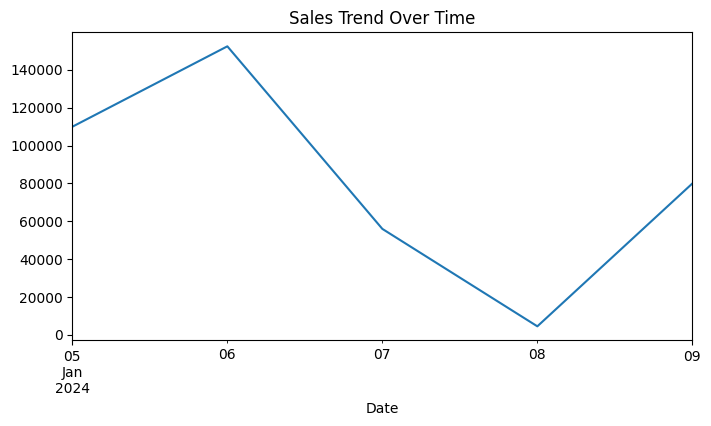

In [10]:
df.groupby('Date')['Total'].sum().plot(kind='line', figsize=(8,4))
plt.title("Sales Trend Over Time")
plt.show()


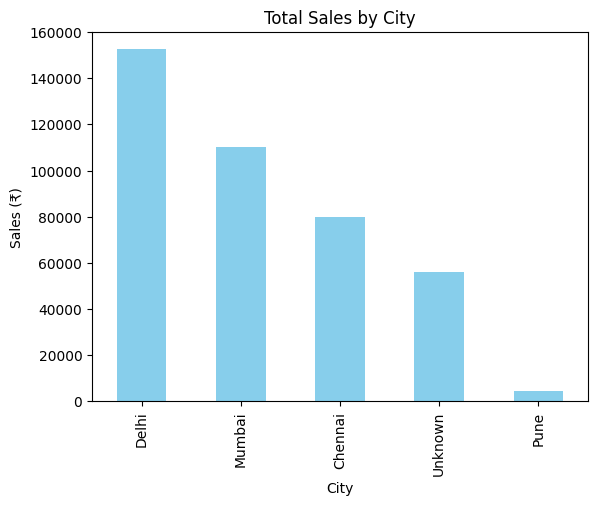

In [11]:
city_sales = df.groupby('City')['Total'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by City")
plt.ylabel("Sales (₹)")
plt.show()


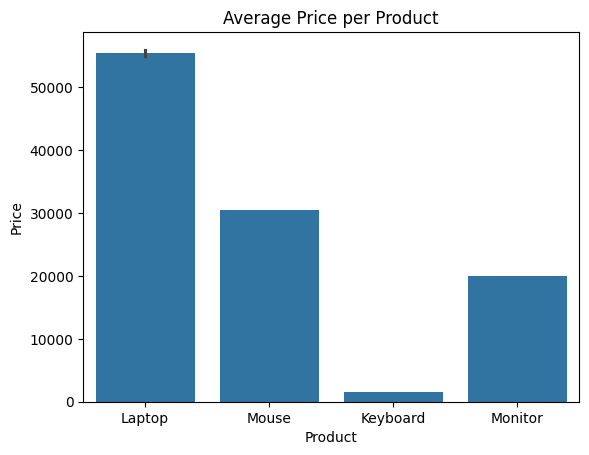

In [12]:
sns.barplot(data=df, x='Product', y='Price')
plt.title("Average Price per Product")
plt.show()


In [13]:
df.to_csv('cleaned_sales.csv', index=False)
